In [1]:
import tensorflow

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [3]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
'/content/drive/MyDrive/dogs vs cats dataset/training_set',
target_size=(150, 150),batch_size=60,class_mode='binary')

Found 8000 images belonging to 2 classes.


In [6]:
validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/dogs vs cats dataset/validation_set',
      target_size=(150,150),batch_size=60,class_mode="binary")

Found 2000 images belonging to 2 classes.


In [7]:
history = model.fit_generator(
train_generator,
epochs=20,
validation_data=validation_generator,
validation_steps=33)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
134/134 [==============================] - 2192s 16s/step - loss: 0.6707 - acc: 0.5746 - val_loss: 0.6318 - val_acc: 0.6283
Epoch 2/20
134/134 [==============================] - 44s 331ms/step - loss: 0.6002 - acc: 0.6719 - val_loss: 0.7201 - val_acc: 0.5980
Epoch 3/20
134/134 [==============================] - 44s 326ms/step - loss: 0.5595 - acc: 0.7080 - val_loss: 0.5771 - val_acc: 0.6833
Epoch 4/20
134/134 [==============================] - 44s 327ms/step - loss: 0.5211 - acc: 0.7381 - val_loss: 0.5969 - val_acc: 0.6722
Epoch 5/20
134/134 [==============================] - 44s 328ms/step - loss: 0.4887 - acc: 0.7644 - val_loss: 0.4966 - val_acc: 0.7586
Epoch 6/20
134/134 [==============================] - 44s 326ms/step - loss: 0.4567 - acc: 0.7860 - val_loss: 0.5006 - val_acc: 0.7596
Epoch 7/20
134/134 [==============================] - 44s 327ms/step - loss: 0.4399 - acc: 0.7981 - val_loss: 0.4602 - val_acc: 0.7854
Epoch 8/20
134/134 [==============================] - 4

In [10]:
model.save('cat vs dog.h5')


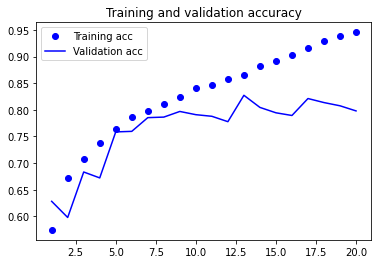

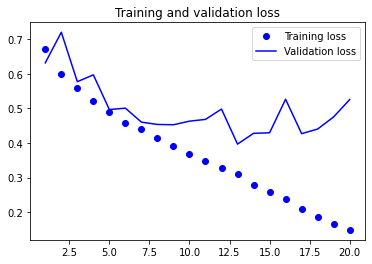

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()